#**Stock Market Analysis**
In recent years, there has been a significant increase in computing power, thanks to the advancements in technology. Among the major players in this field is NVIDIA, whose GPU powers nearly all tech industries. This has allowed for more advanced and sophisticated applications that were once thought impossible.

In this notebook, we will delve into the analysis of trending companies such as NVIDIA, AMD, and Intel to gain a better understanding of their impact on the industry.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# **Load Data**

In [6]:
amd = pd.read_csv('AMD.csv')

intel = pd.read_csv('INTEL.csv')

nvidia = pd.read_csv('NVIDIA.csv')

amd.shape, intel.shape, nvidia.shape

((10919, 7), (10919, 7), (6154, 7))

# **Modify Data**

In [7]:
class Imputer:
    def __init__(self,data):
        self.data=data

    def parse_dates(self):
        self.data['Date']=self.data.Date.apply(lambda x:pd.Timestamp(x))

    def data_after(self,time: str):
        self.data=self.data[self.data.Date >= pd.Timestamp(time)]

    def activate(self,time:str):
        self.parse_dates()
        self.data_after(time)
        return self.data

In [8]:
nvidia = Imputer(nvidia).activate("2018-01-01")
intel = Imputer(intel).activate("2018-01-01")
amd = Imputer(amd).activate("2018-01-01")

In [9]:
merged_df = pd.merge(nvidia.iloc[:,[0,5]], amd.iloc[:,[0,5]], on="Date", how="outer")
merged_df = pd.merge(merged_df, intel.iloc[:,[0,5]], on="Date", how="outer")

merged_df.columns = ["Date", "Adj_Close_NVIDIA", "Adj_Close_AMD", "Adj_Close_INTEL"]

# **Market Movement**
Based on the market analysis, it is evident that NVIDIA and AMD have experienced a significant rise in their growth over the past few years. The movement of the market for these companies shows a steep increase in their stock prices and market value.
On the other hand, Intel has maintained a relatively constant stock price, with no significant spikes or dips in their market performance. This indicates that the competition between NVIDIA and AMD has put pressure on Intel to innovate and keep up with the changing market trends.

It will be interesting to see how these trends continue in the future and whether Intel can regain its position as a market leader.

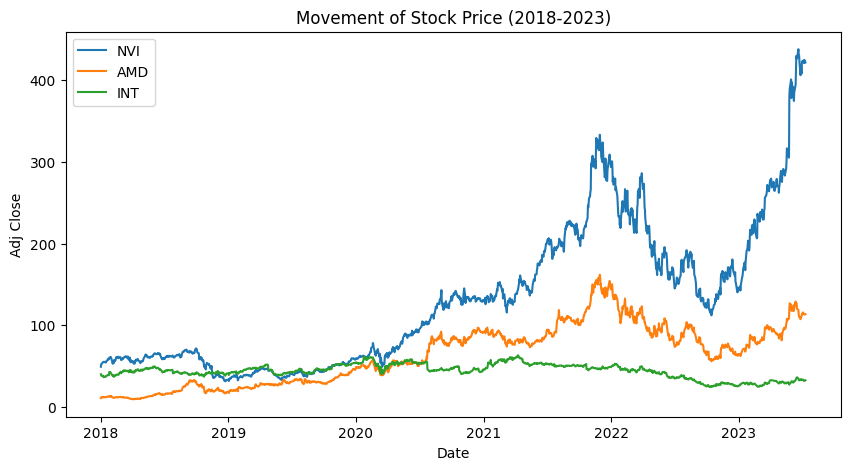

In [10]:
plt.figure(figsize=(10,5))
plt.plot(merged_df["Date"], merged_df["Adj_Close_NVIDIA"], label="NVI")
plt.plot(merged_df["Date"], merged_df["Adj_Close_AMD"], label="AMD")
plt.plot(merged_df["Date"], merged_df["Adj_Close_INTEL"], label="INT")

plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title('Movement of Stock Price (2018-2023)')
plt.legend()
plt.show()

# **Volume vs Market Movement**
Volume of trade and stock price are two important factors that are closely related in the stock market. Volume refers to the number of shares or contracts that are traded in a particular period, such as a day or a week. Stock price refers to the market value of a company's shares, which is determined by the supply and demand of the shares in the market.

In the case of NVIDIA, we can see from the data that the stock price has been quite volatile in the past few months. The stock started at a price of 233.20 on March 3rd, 2023, and reached a high of 280 on April 4th, 2023.
The high volume of shares traded indicates that there is significant interest in NVIDIA stock among investors. This can be attributed to the company's strong financial performance, positive market outlook, and ongoing developments in the technology industry.

In [11]:
def plot(data, stock):
    data = data.iloc[1200:,:]
    fig, ax1 = plt.subplots(figsize=(20, 8))

    ax2 = ax1.twinx()
    ax1.bar(x=data.Date, height=data.Volume,alpha=0.7)
    ax2.plot(data.Date, data["High"],'g-')
    ax2.plot(data.Date, data["Low"],'r-')


    plt.title(f'Volume and Market Price ({stock})')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Volume', color='b')
    ax2.set_ylabel('High/Low', color='g');

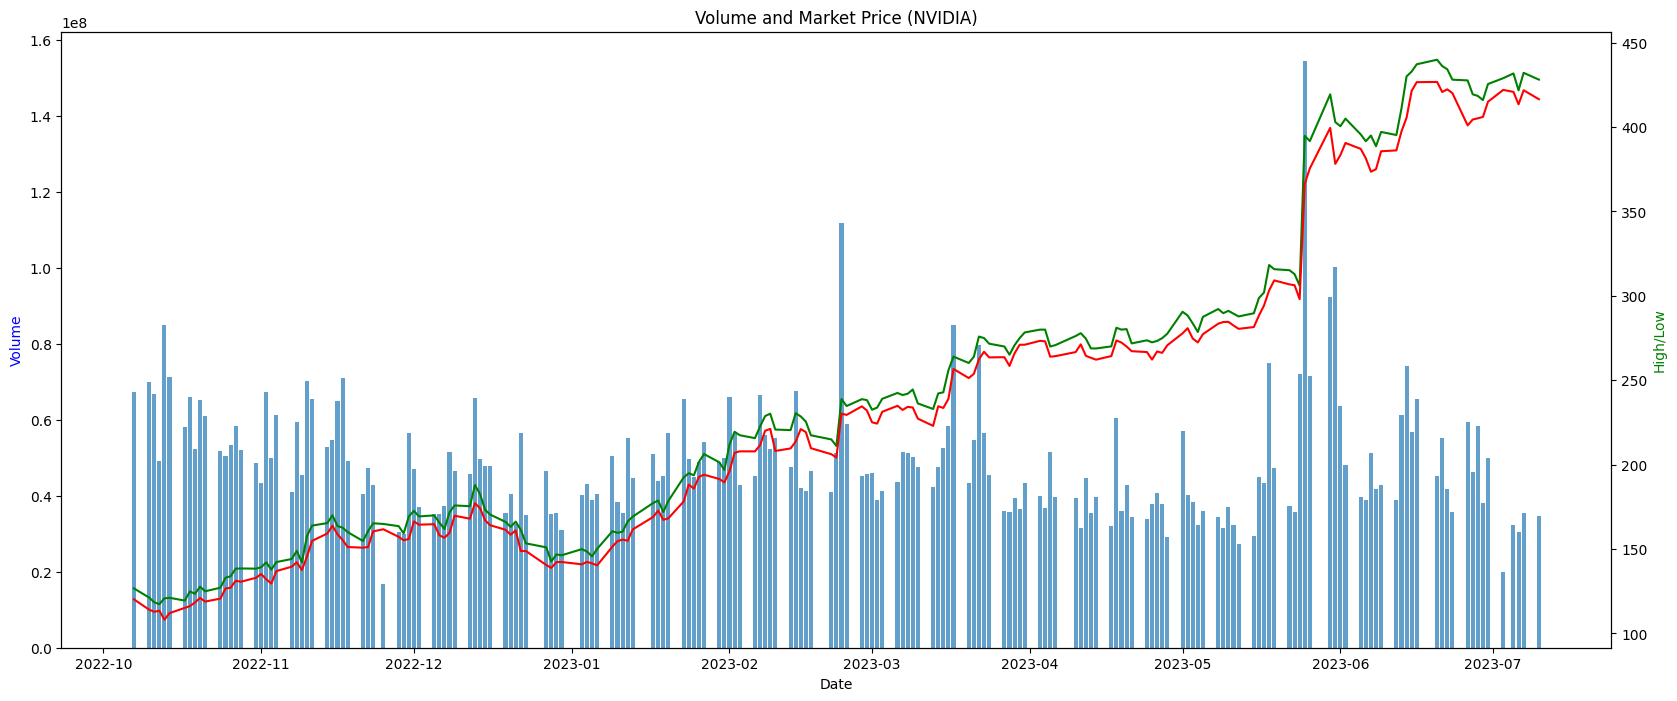

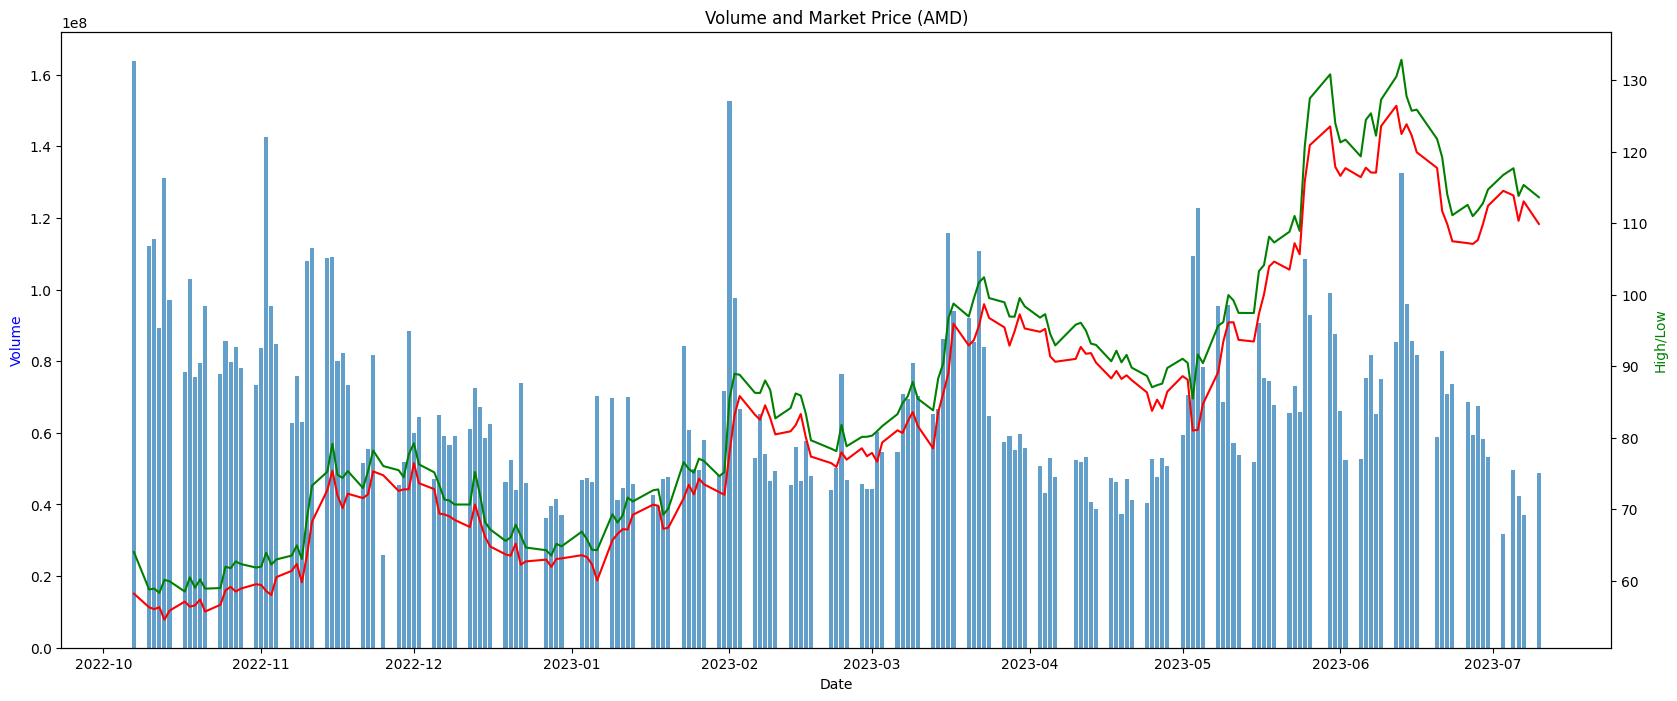

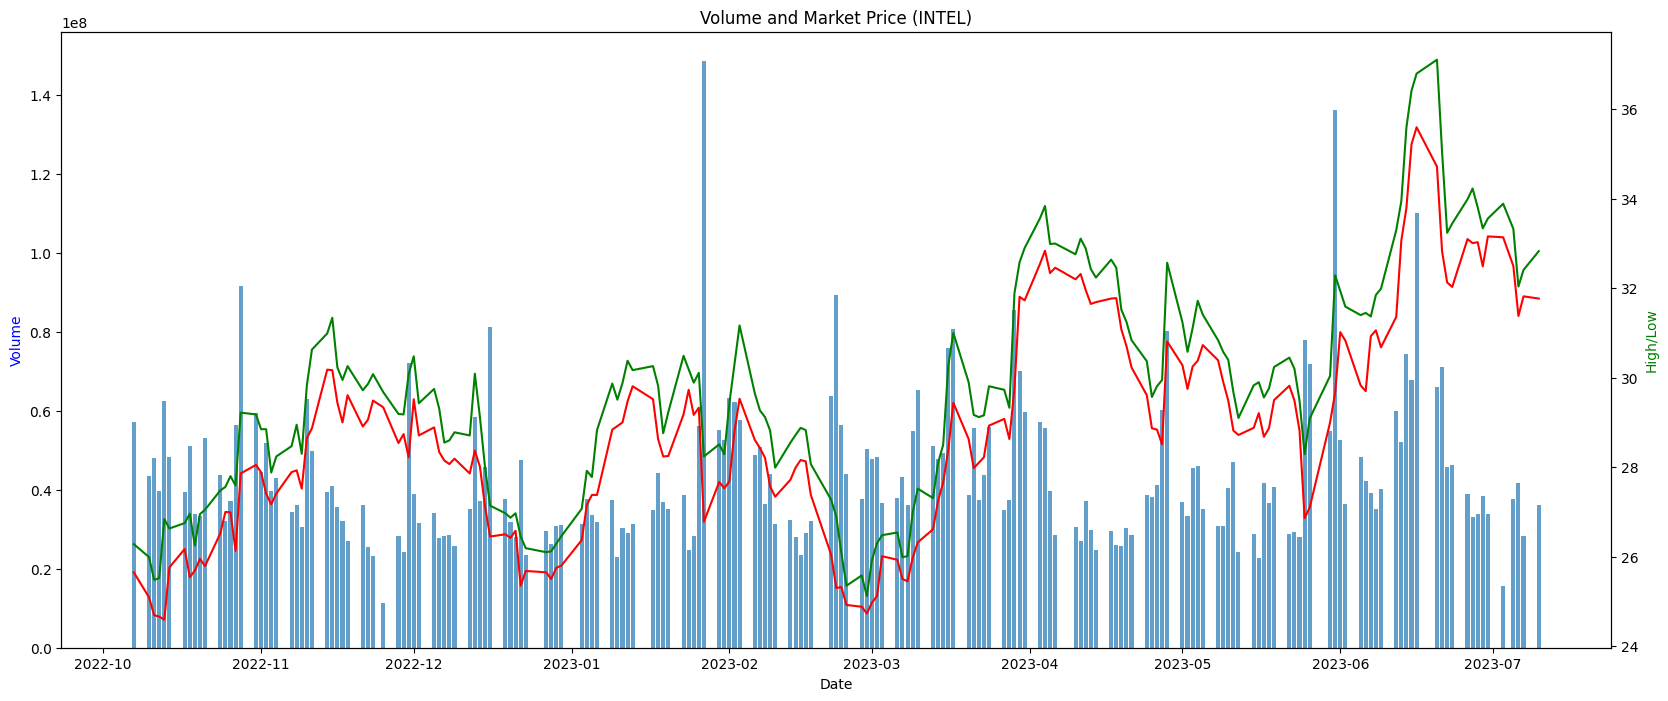

In [12]:

plot(nvidia, "NVIDIA")
plot(amd, "AMD")
plot(intel, "INTEL")

# **Correlation**
NVIDIA AND AMD
In this case, we can see that the strongest positive correlation is between NVIDIA and AMD. This suggests that the two stocks tend to move together, and that changes in the price of one are often accompanied by similar changes in the other.
NVIDIA AND INTEL
Here there is a weak negative correlation between NVIDIA and Intel, indicating that the two stocks tend to move in opposite directions. This could be due to differences in their respective business models or market factors affecting the industry.
It is important to note that correlation does not necessarily imply causation, and that there may be other factors at play that are driving the prices of these stocks. It is also important to conduct further analysis and consider other metrics before making investment decisions.

<ipython-input-13-d4ed24b12ff1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, cmap="coolwarm");


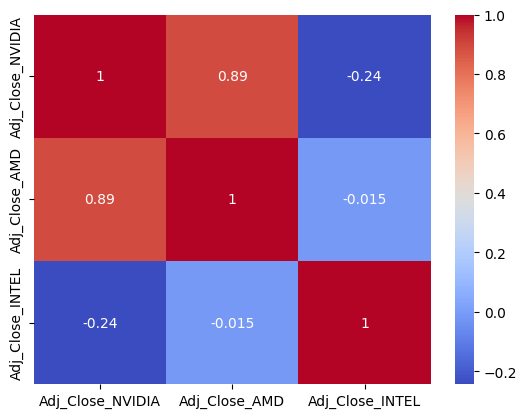

In [13]:
import seaborn as sns

sns.heatmap(merged_df.corr(), annot=True, cmap="coolwarm");

**Conclusion**

The stock price of a company is influenced by various factors, including its financial performance, industry trends, news and events, and overall market conditions.

The volume of trade is an important metric that indicates the level of investor interest in a stock. High trading volumes can indicate bullish or bearish sentiment, depending on whether most traders are buying or selling the stock.

The correlation analysis shows that there is a moderate positive correlation between NVIDIA's stock price and trading volume, indicating that as the volume of trade increases, so does the stock price.